In [1]:
import numpy as np
import growth_simulations as g
import os
import scipy
import time
# import seaborn as sns
import weakref
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
# sns.set_style("whitegrid")

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
def penalty_model(l, x, sigma_l, epsilon, exp):
    num = (1-x)*np.log((1-x)/2)**2+(1+x)*(np.log((1+x)/2))**2
    denom = (1-x)*np.log((1-x)/2)+(1+x)*np.log((1+x)/2)
    penalty = 1-epsilon*x**exp
    return l*penalty*(1-sigma_l**2/(l*penalty)**2*(1+0.5*num/denom))

In [5]:
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.array([0.0])  # 1
lambda_std = np.array([0.1])  # 1
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
alpha = np.array([1.0])  # 1
num_rep = 100  # number of repeats 100
epsilon = np.linspace(0.0, 0.02, 6)  # 6
exp_n = np.array([2,4]) # 2
x=1-2*beta
# epsilon=np.array([0.0]) # no penalty for now.
# # should give 24000 repeats. Run with 1200 job array.
# # should take around 4 hours (240min).50030516

par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 13, 'delta': delta[0], 'lambda': l[0], 'lambda_std': lambda_std[0], 'td_std':td_std[0]}
X = [len(epsilon), len(exp_n), len(beta), len(alpha), num_rep]
data=np.load('./output_compiled.npy')

In [6]:
# loc=np.nonzero(data[:,:,:,:,:,:,:]==0)
# data[loc]=np.nan

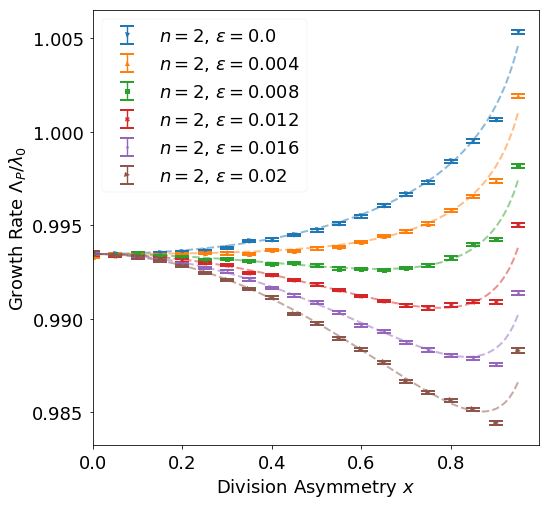

In [7]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=0
i1=0
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.','>']
# sizes=[8,5,5,5,5]
for ind in range(len(epsilon)):
    yv=np.nanmean(data[ind,i1,ind_beta_start:,i0,:,2,3],axis=1)
    ystd=np.nanstd(data[ind,i1,ind_beta_start:,i0,:,2,3],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$n={0}$, $ \epsilon={1}$'.format(exp_n[i1],epsilon[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
for ind in range(len(epsilon)):
    yv=penalty_model(l, xv, par_vals['lambda_std'], epsilon[ind], exp_n[i1])
#     plt.plot(xv,yv,label=r'Theory  $ \epsilon={0}$'.format(epsilon[ind]),linestyle='--',lw=2)
    plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'Growth Rate $\Lambda_P/\lambda_0$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/2A.eps',dpi=300,bbox_inches='tight')

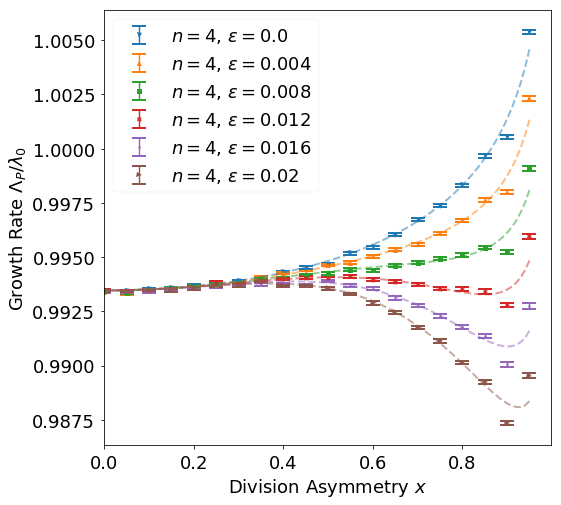

In [8]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=0
i1=1
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.','>']
# sizes=[8,5,5,5,5]
for ind in range(len(epsilon)):
    yv=np.nanmean(data[ind,i1,ind_beta_start:,i0,:,2,3],axis=1)
    ystd=np.nanstd(data[ind,i1,ind_beta_start:,i0,:,2,3],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$n={0}$, $ \epsilon={1}$'.format(exp_n[i1],epsilon[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
for ind in range(len(epsilon)):
    yv=penalty_model(l, xv, par_vals['lambda_std'], epsilon[ind], exp_n[i1])
    #     plt.plot(xv,yv,label=r'Theory  $ \epsilon={0}$'.format(epsilon[ind]),linestyle='--',lw=2)
    plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'Growth Rate $\Lambda_P/\lambda_0$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/2B.eps',dpi=300,bbox_inches='tight')